In [1]:
from google.colab import files
uploaded=files.upload()

Saving time.xlsx to time.xlsx


In [2]:
import pandas as pd
df=pd.read_excel(uploaded['time.xlsx'])
data=df['time']
data1=data.tolist()

In [3]:
def preparedata(data,steps):
  x=[]
  y=[]
  for i in range(len(data)-steps):
    x.append(data[i:i+3])
    y.append(data[i+3])
  return x,y

In [4]:
x,y=preparedata(data1,3)
import numpy as np
xarr=np.array(x)
yarr=np.array(y)
yarr1=yarr.reshape(-1,1)    #yarr1=yarr.reshape(yarr.shape[0],1)
yarr1.shape

(7890, 1)

In [12]:
from keras.layers import Flatten,Dense,LSTM  #LSTM i shidden function
from keras.models import Sequential
model=Sequential()

model.add(LSTM(200,activation='relu',return_sequences=True,
               input_shape=(3,1)))
model.add(LSTM(200))
model.add(Dense(42)) #42 uniqu class in y
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hs=model.fit(xarr,yarr1,epochs=10)

Epoch 1/10
247/247 [==============================] - 9s 24ms/step - loss: 10.6045 - accuracy: 0.0606
Epoch 2/10
247/247 [==============================] - 6s 25ms/step - loss: 6.0362 - accuracy: 0.0179
Epoch 3/10
247/247 [==============================] - 6s 25ms/step - loss: 3.7377 - accuracy: 0.0014
Epoch 4/10
247/247 [==============================] - 6s 25ms/step - loss: 3.7377 - accuracy: 0.0014
Epoch 5/10
247/247 [==============================] - 6s 25ms/step - loss: 3.7377 - accuracy: 0.0014
Epoch 6/10
247/247 [==============================] - 6s 25ms/step - loss: 3.7377 - accuracy: 0.0014
Epoch 7/10
247/247 [==============================] - 6s 25ms/step - loss: 3.7377 - accuracy: 0.0014
Epoch 8/10
247/247 [==============================] - 6s 25ms/step - loss: 3.7377 - accuracy: 0.0014
Epoch 9/10
247/247 [==============================] - 6s 24ms/step - loss: 3.7377 - accuracy: 0.0014
Epoch 10/10
247/247 [==============================] - 6s 25ms/step - loss: 3.7377 - accur

In [13]:
hs.history.keys()

dict_keys(['loss', 'accuracy'])

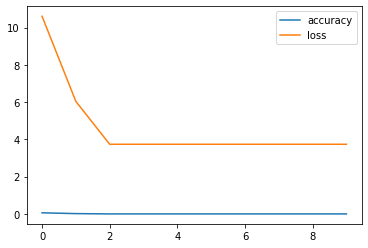

In [14]:
import matplotlib.pyplot as plt
plt.plot(hs.history['accuracy'])
plt.plot(hs.history['loss'])
plt.legend(['accuracy','loss'])
